# Differences in the occurrence of geo locations between the Sci-fi and the random corpora

#### Statistical significance of differences in occurrence per 100k words of urban locations between the two corpora


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#Create dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

geo = pd.read_csv('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/geo.csv.gz')

In [0]:
geo["decade"] = (geo["year"]//10)*10

In [0]:
geo_scifi = geo[geo["corpus"] == "scifi"]
geo_random = geo[geo["corpus"] == "random"]

In [0]:
urban = geo.dropna(thresh=1, subset=["locality", "admin_3"])
urban_scifi = urban[urban["corpus"] == "scifi"]
urban_random = urban[urban["corpus"] == "random"]

In [0]:
chisquare = scs.chisquare
chi2 = scs.chi2

def chi_square_test(x0, x1):
    # x0, x1 is my data as numpy arrays
    # sampling
    N = range(0, len(x0), 1)
    n = len(x1)
    chi2_dist = list()
    p_dist = list()
    for _ in range(100):
        idxs = np.random.choice(N, n, replace=True)
        x0_sample = [x0[idx] for idx in idxs]
        chi_2, p = chisquare(f_obs=x1, f_exp=x0_sample)
        chi2_dist.append(chi_2)
        p_dist.append(p)
    # critical value for X^2 distribution
    alpha = 0.05
    probability = 1 - alpha
    df = n - 1
    value = chi2.ppf(probability, df)
    
    return chi2_dist, p_dist, value

## STATS 1 URBAN Occurrences of urban locations per 100k of words in each book

In [0]:
#STATS 1: Mean of number of urban locations per 100k of words in each book for each corpus
urban.groupby(["corpus", "htid"], as_index=False)["occurs_100k"].sum().groupby("corpus").mean()

,occurs_100k
corpus,
random,174.701275
scifi,105.397152


In [0]:
#STATS 1: Number of urban locations per 100k of words in each book
g1sf = urban_scifi.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()
g1ran = urban_random.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()

Ttest_indResult(statistic=-8.008154499959073, pvalue=1.2432193993420324e-15)
MannwhitneyuResult(statistic=1618772.0, pvalue=4.857548704816317e-31)
votes for H1:100, and votes for H0:0


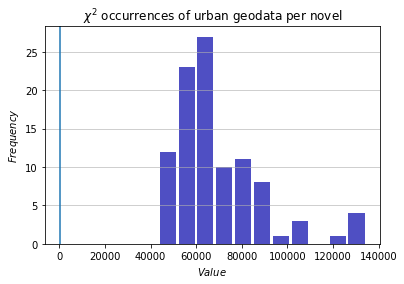

In [0]:
print(scs.ttest_ind(g1sf, g1ran))
print(scs.mannwhitneyu(g1sf, g1ran))
chi2_dist, p_dist, value = chi_square_test(g1ran, g1sf)

# report
plt.hist(x=chi2_dist, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$ occurrences of urban geodata per novel")
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/chi2_stats1_urban', dpi=500)
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist > value), len(chi2_dist)-np.sum(chi2_dist > value)))

In [0]:
g1 = urban.groupby(["corpus", "htid"], as_index=False)["occurs_100k"].sum()
#g1["occurs_100k"] = np.log2(g1["occurs_100k"])

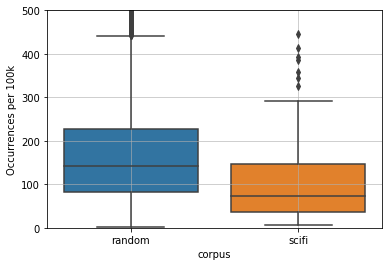

In [0]:
sns.boxplot(x="corpus", y= "occurs_100k", data=g1)
#sns.stripplot(x="corpus", y="occurs_100k", data=g1, size=2, alpha=.25)
plt.ylabel('Occurrences per 100k')
plt.ylim(0,500)
plt.grid(alpha=0.75)
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/occurs100k_distribution', dpi=500)

### Occurrences of urban location per 100k of words in each book, overtime 

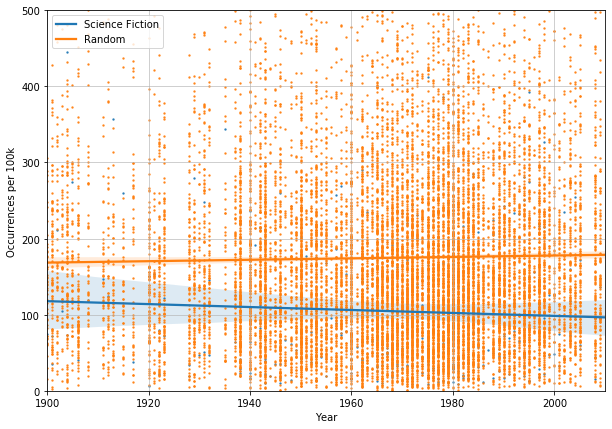

In [0]:
ga = urban_scifi.groupby(["year", "htid"], as_index=False).sum()
gb = urban_random.groupby(["year", "htid"], as_index=False).sum()

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=ga.year,y=ga.occurs_100k,color='tab:blue', scatter_kws={'s':2})
sns.regplot(x=gb.year,y=gb.occurs_100k,color='tab:orange', scatter_kws={'s':2})

# Legend, title and labels.
plt.legend(labels=['Science Fiction','Random'])
plt.grid(alpha=0.75)
plt.xlim(1900,2010)
plt.ylim(0, 500)
plt.xlabel('Year')
plt.ylabel('Occurrences per 100k')
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/occurrences_overtime', dpi=500)

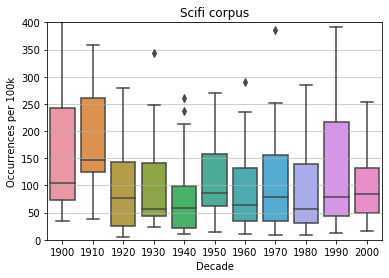

In [0]:
cond = (urban_scifi["decade"] >= 1900) & (urban_scifi["decade"] <= 2011)
g = urban_scifi[cond].groupby(["decade", "htid"], as_index=False).sum()

plt.grid(alpha=0.75)
sns.boxplot(x="decade", y="occurs_100k", data=g)
plt.ylim(0, 400)
plt.title("Scifi corpus")
plt.xlabel('Decade')
plt.ylabel('Occurrences per 100k')
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/occurrences_decade_sf', dpi=500)

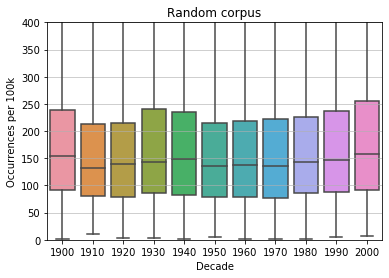

In [0]:
cond2 = (urban_random["decade"] >= 1900) & (urban_random["decade"] <= 2011)
g = urban_random[cond2].groupby(["decade", "htid"], as_index=False).sum()

plt.grid(alpha=0.75)
sns.boxplot(x="decade", y="occurs_100k", data=g)
plt.title("Random corpus")
plt.ylim(0, 400)
plt.xlabel('Decade')
plt.ylabel('Occurrences per 100k')
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/occurrences_decade_ran', dpi=500)

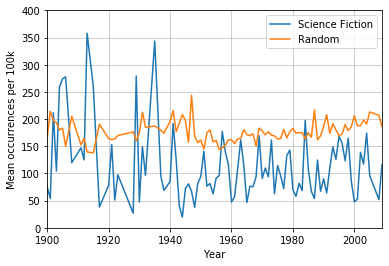

In [0]:
#Mean of occurrences of urban locations per 100k words per book per year
ga = urban_scifi.groupby(["year", "htid"], as_index=False).sum().groupby("year").mean().occurs_100k
gb = urban_random.groupby(["year", "htid"], as_index=False).sum().groupby("year").mean().occurs_100k

ax = ga.plot(color='tab:blue')
gb.plot(ax=ax, color='tab:orange')
plt.legend(labels=['Science Fiction','Random'])
plt.grid(alpha=0.75)
plt.ylim(0,400);
plt.xlabel("Year")
plt.ylabel("Mean occurrences per 100k")
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/occurrences_year', dpi=500)

## STATS 2 URBAN Occurrences per 100k of words per each location

In [0]:
urban.groupby(["corpus", "formatted_address", "htid"], as_index=False)["occurs_100k"].sum().groupby("corpus").mean()

,occurs_100k
corpus,
random,3.272494
scifi,2.569701


Ttest_indResult(statistic=-6.263394166645988, pvalue=3.768643006287214e-10)
MannwhitneyuResult(statistic=5423319950.0, pvalue=1.6243295426688348e-15)
votes for H1:100, and votes for H0:0


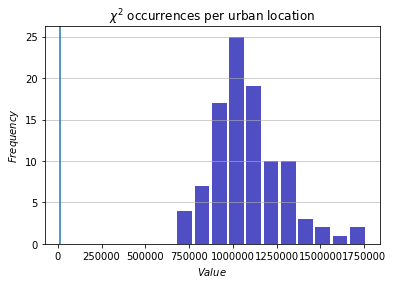

In [0]:
g2sf = urban_scifi.groupby(["formatted_address", "htid"], as_index=False).sum()["occurs_100k"].dropna()
g2ran = urban_random.groupby(["formatted_address", "htid"], as_index=False).sum()["occurs_100k"].dropna()

print(scs.ttest_ind(g2sf, g2ran))
print(scs.mannwhitneyu(g2sf, g2ran))
chi2_dist2, p_dist2, value2 = chi_square_test(g2ran, g2sf)

# report
plt.hist(x=chi2_dist2, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value2) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$ occurrences per urban location")
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/chi2_stats2_urban', dpi=500)
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist2 > value2), len(chi2_dist2)-np.sum(chi2_dist2 > value2)))

## Chi square test on each exact urban location

In [0]:
#Create list of individual locations for each corpus
loc_scifi = urban_scifi["formatted_address"].unique()
loc_random = urban_random["formatted_address"].unique()

In [0]:
#Intersection of the two lists = locations in common
locations = np.intersect1d(loc_scifi, loc_random, assume_unique=True).tolist()

In [0]:
#Creation of dictionary containing locations' addresses as keys and lists of occurs_100k values per each book as values
def dict_creation(geodata, loc_list):
    
    loc_dict = dict()
    for location in loc_list:
        g = geodata[geodata["formatted_address"] == location].groupby("htid", as_index=False)["occurs_100k"].sum()
        loc_100k_list = g["occurs_100k"].dropna().tolist()
        loc_dict[location] = loc_100k_list
    
    return loc_dict

In [0]:
loc_100k_scifi = dict_creation(urban_scifi, locations)

In [0]:
%%time
loc_100k_random = dict_creation(urban_random, locations)

CPU times: user 5min 23s, sys: 220 ms, total: 5min 23s
Wall time: 5min 23s


In [0]:
chisquare = scs.chisquare
chi2 = scs.chi2

def locations_chisquare(dict1, dict2):
    
    votes = dict()
    votes["loc"] = []
    votes["H0"] = []
    votes["H1"] = []
    votes["chi2"] = []
    votes["p"] = []
    votes["diff"] = []
    votes["occ_100k_ran"] = []
    votes["occ_100k_sf"] = []
    for loc in dict1.keys():
        votes["loc"].append(loc)
        votes["occ_100k_ran"].append(np.median(dict1[loc]))
        votes["occ_100k_sf"].append(np.median(dict2[loc]))
        
        if len(dict1[loc]) > len(dict2[loc]):
            chi2_dist, p_dist, value = chi_square_test(dict1[loc], dict2[loc])
        else:    
            chi2_dist, p_dist, value = chi_square_test(dict2[loc], dict1[loc])

        votes["chi2"].append(np.average(chi2_dist))
        votes["p"].append(np.average(p_dist))
        votes["H1"].append(np.sum(chi2_dist > value))
        votes["H0"].append(len(chi2_dist)-np.sum(chi2_dist > value))
        differences = [i - value for i in chi2_dist]
        votes["diff"].append(np.average(differences))

    return votes

In [0]:
%%time
loc_chi2_dict = locations_chisquare(loc_100k_random, loc_100k_scifi)

In [0]:
loc_chi2 = pd.DataFrame(data=loc_chi2_dict)

In [0]:
loc_chi2.sort_values(["H0"], ascending=False)

,loc,H0,H1,chi2,p,diff,occ_100k_ran,occ_100k_sf
1979,"Gulf Coast State College, 5230 US-98, Panama C...",99,1,5.230054,0.723352,-10.277259,0.892819,0.644529
2732,"Lincoln St, Worcester, MA, USA",99,1,8.910402,0.552920,-9.396636,1.440300,1.057060
3095,"Mid-Atlantic Federal Credit Union, 11140 New H...",100,0,1.134022,0.879219,-8.353707,0.817107,0.569768
5498,"Wonderland Theater, 110 S Main St, Paullina, I...",99,1,4.248956,0.663797,-8.342631,1.067441,0.898618
349,"Ave of the Americas, New York, NY, USA",98,2,3.073088,0.709580,-7.997410,1.067250,0.872322


In [0]:
loc_chi2.sort_values(['diff'], ascending=False)[0:10]

,loc,H0,H1,chi2,p,diff,occ_100k_ran,occ_100k_sf
78,"Abbaye de Cluny, Rue du 11 Août 1944, 71250 Cl...",0,100,181987.423786,8.296276e-48,181983.582327,0.879492,181.354966
1398,"Dresden, Germany",0,100,147313.874528,0.000000e+00,147295.567490,1.040767,1.322297
2784,"London, UK",0,100,24227.948240,0.000000e+00,24049.462888,5.068020,2.262819
2536,"Knosos 714 09, Greece",0,100,23253.305911,0.000000e+00,23247.314447,1.321120,1.985112
5233,"Ventnor City, NJ, USA",0,100,21484.504808,3.104255e-273,21480.663349,1.068924,75.058755
138,"Alexandria, Alexandria Governorate, Egypt",0,100,20981.417022,2.811491e-110,20951.273495,1.244278,0.936565
863,"Canton, OH, USA",0,100,19808.244581,6.073407e-114,19794.177440,1.238697,1.541864
4489,"Sofia, Bulgaria",2,98,18799.555539,8.652313e-03,18795.714080,1.527383,71.655879
3409,"New York, NY, USA",0,100,17977.685504,0.000000e+00,17652.311423,5.262200,3.550722
4274,"San Lorenzo, CA, USA",0,100,16421.178872,9.987629e-190,16417.337413,1.184300,58.385876


In [0]:
# Get locations with most significant difference and high occurrence per 100k words
top = sorted(loc_chi2.sort_values(['diff'], ascending=False)[:10]["loc"].tolist())
top_geo = geo.loc[geo["formatted_address"].isin(top) == True].groupby(["corpus", "formatted_address", "htid"], as_index=False).sum()

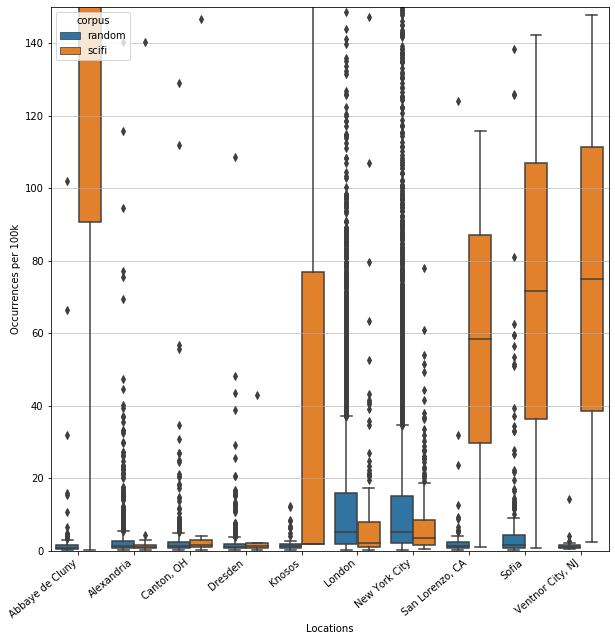

In [0]:
fig = plt.figure(figsize=(10,10))
plt.grid(alpha=0.75)
g = sns.boxplot(x="formatted_address", y="occurs_100k", hue="corpus", data=top_geo)
(g.set_xticklabels(["Abbaye de Cluny", "Alexandria", "Canton, OH", "Dresden", "Knosos", "London", "New York City", "San Lorenzo, CA", "Sofia", "Ventnor City, NJ"], rotation=40, ha="right", fontsize=10))
plt.ylim(0, 150)
plt.xlabel('Locations')
plt.ylabel('Occurrences per 100k')
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/diff_locations', dpi=500)

In [0]:
# Get locations with highest H0 score and high occurrences per 100k words
loc_chi2.sort_values(['H0'], ascending=False).sort_values(['diff'])[:10]

# Comparison between differences with urban locations and general locations

## STATS 1 GENERAL Occurrences of general locations per 100k of words in each book

In [0]:
#STATS 1: Number of urban locations per 100k of words in each book
g1Asf = geo_scifi.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()
g1Aran = geo_random.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()

print(scs.ttest_ind(g1Asf, g1Aran))
print(scs.mannwhitneyu(g1Asf, g1Aran))
chi2_dist, p_dist, value = chi_square_test(g1Aran, g1Asf)

# report
plt.hist(x=chi2_dist, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$ occurrences of general geodata per novel")
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/chi2_stats1_general', dpi=500)
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist > value), len(chi2_dist)-np.sum(chi2_dist > value)))

## STATS 2 GENERAL Occurrences per 100k of words per each location

In [0]:
g2Asf = geo_scifi.groupby(["formatted_address", "htid"], as_index=False).sum()["occurs_100k"].dropna()
g2Aran = geo_random.groupby(["formatted_address", "htid"], as_index=False).sum()["occurs_100k"].dropna()


print(scs.ttest_ind(g2Asf, g2Aran))
print(scs.mannwhitneyu(g2Asf, g2Aran))
chi2_dist2, p_dist2, value2 = chi_square_test(g2Aran, g2Asf)

# report
plt.hist(x=chi2_dist, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$ occurrences per general location")
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/chi2_stats2_general', dpi=500)
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist > value), len(chi2_dist)-np.sum(chi2_dist > value)))

# Correlation between wordliness and urbanness

In [0]:
#Uploading data on the occurrences of urban terms in the scifi and random corpus
terms = pd.read_csv('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/termsdata.csv.gz')
terms["lem_word"] = terms["lem_word"].astype(str)

In [0]:
import csv

def creating_terms_list(csv_path):

    with open(csv_path, 'r', encoding='utf-8') as csv_file:
        dict_csv = csv.DictReader(csv_file)
        list_terms = [row["term"] for row in dict_csv]

        return list_terms

In [0]:
#Extract urban terms collected by hand
urbanterms = creating_terms_list("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/urbanterms.csv")
print(len(urbanterms))

77


### Correlation between occurrences of urban locations and occurrences of terms in both corpora

In [0]:
#Slicing geodata dataframe and setting the index on the htid columns
geo_loc = urban.groupby("htid", as_index=False)["occurs_100k"].sum().set_index("htid").dropna()
geo_loc.rename(columns={"occurs_100k": "geo_occ"}, inplace=True)

In [0]:
#Slicing termsdata dataframe and setting index on the htid column
terms_urban = terms.loc[terms["lem_word"].isin(urbanterms)].groupby("htid", as_index=False)["occurs_100k"].sum().set_index("htid").dropna()
terms_urban.rename(columns={"occurs_100k": "terms_occ"}, inplace=True)

In [0]:
#Merge dataframes
correlation = pd.merge(left=terms_urban, right=geo_loc, on="htid")
print(len(correlation.index))
print(correlation.corr())

7116
           terms_occ   geo_occ
terms_occ   1.000000  0.169595
geo_occ     0.169595  1.000000


In [0]:
x = np.log2(correlation.terms_occ.values)
y = np.log2(correlation.geo_occ.values)

In [0]:
from sklearn import linear_model
from sklearn.metrics import r2_score

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

In [0]:
r2_score(y, y_pred)

0.03902392157205026

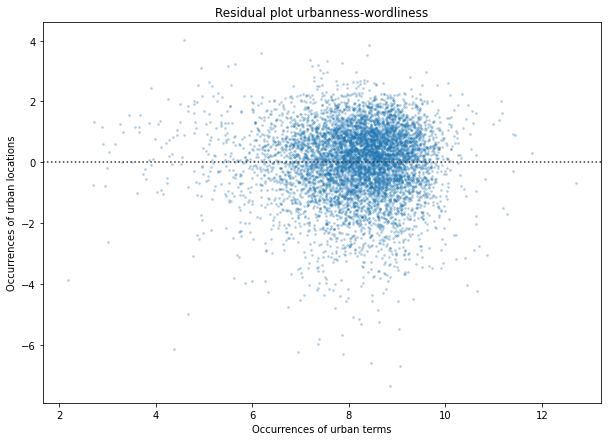

In [0]:
fig = plt.figure(figsize=(10,7))
sns.residplot(x, y, scatter_kws={"alpha":.25, "s":3})
plt.xlabel("Occurrences of urban terms")
plt.ylabel("Occurrences of urban locations")
plt.title("Residual plot urbanness-wordliness")
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/residplot', dpi=500)

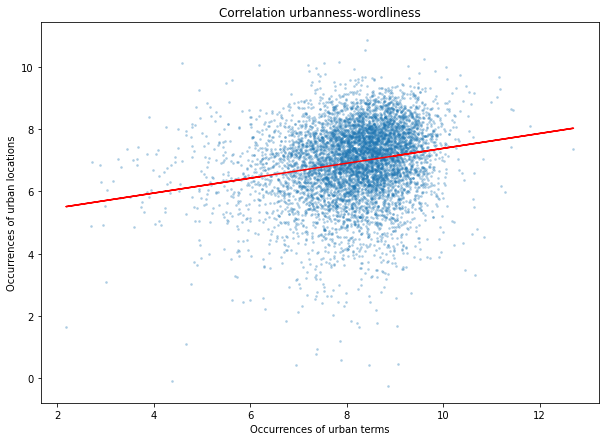

In [0]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x, y, alpha=.25, s=3)
plt.plot(x, y_pred, color='red')
plt.xlabel("Occurrences of urban terms")
plt.ylabel("Occurrences of urban locations")
plt.title("Correlation urbanness-wordliness")
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/correlation', dpi=500)

### Correlation between occurrences of urban locations and occurrences of terms in the scifi corpus

In [0]:
#Slicing geodata dataframe and setting the index on the htid columns
geo_scifi = urban_scifi.groupby("htid", as_index=False)["occurs_100k"].sum().set_index("htid").dropna()
geo_scifi.rename(columns={"occurs_100k": "geo_occ"}, inplace=True)

In [0]:
correlation2 = pd.merge(left=terms_urban, right=geo_scifi, on="htid")
print(len(correlation2.index))
print(correlation2.corr())

322
           terms_occ   geo_occ
terms_occ   1.000000  0.231468
geo_occ     0.231468  1.000000


In [0]:
x2 = correlation2.terms_occ.values
y2 = correlation2.geo_occ.values

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x2 = x2.reshape(-1, 1)
y2 = y2.reshape(-1, 1)
linear_regression = LinearRegression().fit(x2, y2)  # create object for the class & perform linear regression
print('R2 score: ', linear_regression.score(x2, y2))

R2 score:  0.0535774521257274


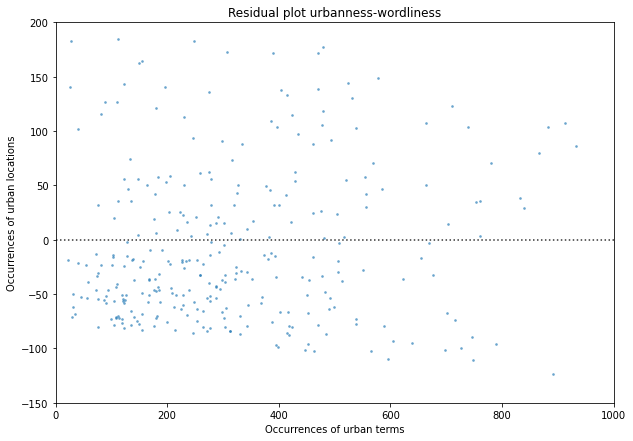

In [0]:
fig = plt.figure(figsize=(10,7))
sns.residplot(x2, y2, scatter_kws={"alpha":.5, "s":3})
plt.xlim(0,1000)
plt.ylim(-150,200)
plt.xlabel("Occurrences of urban terms")
plt.ylabel("Occurrences of urban locations")
plt.title("Residual plot urbanness-wordliness")
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/residplot', dpi=500)

Text(0.5, 1.0, 'Correlation urbanness-wordliness')

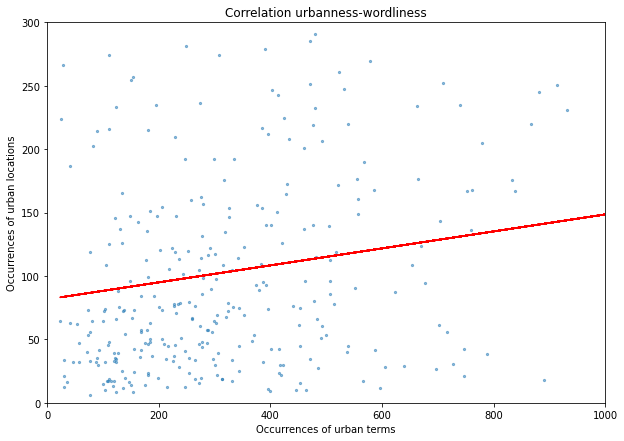

In [0]:
fig = plt.figure(figsize=(10,7))
plt.scatter(x2, y2, alpha=.5, s=5)
plt.xlim(0,1000)
plt.ylim(0,300)
plt.plot(x2, y_pred2, color='red')
plt.xlabel("Occurrences of urban terms")
plt.ylabel("Occurrences of urban locations")
plt.title("Correlation urbanness-wordliness")
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/4_geodata/correlation', dpi=500)